In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
df = pd.read_csv('data_ERCOFTAC_case_26.csv')
df

,x/D,U/U0
0,0.877910,0.999355
1,1.908962,0.997459
2,2.858501,0.980602
3,3.889560,0.978083
4,4.930929,0.965588
5,5.911341,0.924416
6,6.932892,0.853319
7,7.913698,0.773494
8,8.904675,0.697409
9,9.875006,0.643769


In [230]:
custom_x_points = np.arange(0.0, 25.0, 1.0)

# Interpolate the Y values for custom_x_points using pandas' interpolate method
interpolated_y_values = df['U/U0'].interpolate(method='linear', xp=df['x/D'], x=custom_x_points)

# If there are any NaN values in the interpolated results, fill them with the nearest available value
interpolated_y_values = interpolated_y_values.fillna(method='bfill').values

interpolated_y_values

array([0.99935492, 0.99745888, 0.98060229, 0.97808281, 0.96558801,
       0.92441643, 0.85331864, 0.77349368, 0.69740912, 0.64376896,
       0.58701032, 0.537734  , 0.50342002, 0.46723597, 0.43728608,
       0.40422128, 0.37988185, 0.35616816, 0.33432276, 0.31559457,
       0.30060651, 0.27876035, 0.26252566, 0.25190246, 0.24190041])

In [231]:
df_moose = pd.read_csv('case_26_2D_csv_central_velocity_0037.csv')
df_moose

FileNotFoundError: [Errno 2] No such file or directory: 'case_26_2D_csv_central_velocity_0037.csv'

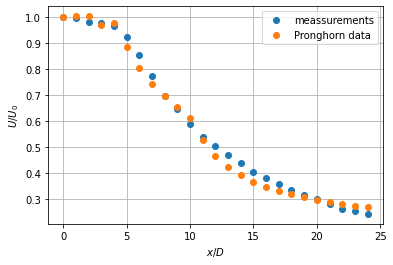

In [241]:
plt.figure()
plt.plot(custom_x_points, interpolated_y_values, 'o', label='meassurements')
plt.plot(custom_x_points, df_moose['vel_x']/(df_moose['vel_x'][0]), 'o', label='Pronghorn data')
plt.legend()
plt.grid()
plt.ylabel("$U/U_0$")
plt.xlabel("$x/D$")
plt.show()

In [243]:
np.linalg.norm(interpolated_y_values - df_moose['vel_x']/(df_moose['vel_x'][0])) / np.linalg.norm(interpolated_y_values)

0.041083823755147304

In [501]:
!rm case_*.csv

In [502]:
import glob
from scipy.interpolate import interp1d

matching_files = glob.glob('data_y*')
custom_x_points = np.linspace(2.0, 74.0, 30)

data_case_79 = {}
for f in matching_files:
    data_case_79[f] = pd.read_csv(f)

interp_data_case_79 = {}
for f in matching_files:
    interp_function = interp1d(data_case_79[f]['x (mm)'].values,
                                      data_case_79[f][' V (m/s)'].values,
                                      kind='linear',
                                      fill_value='extrapolate')
    interp_data_case_79[f] = interp_function(custom_x_points)

In [503]:
import glob
matching_files_sim = glob.glob('case_79_csv_y*')
sim_data = {}
for f in matching_files_sim:
    sim_data[f] = pd.read_csv(f)

In [504]:
all_keys = {}
time_key = '23'
all_keys["interp"] = ['data_y_0d05.csv', 'data_y_0d1.csv', 'data_y_0d3.csv', 'data_y_0d4.csv', 'data_y_0d5.csv',
                      'data_y_0d6.csv', 'data_y_0d7.csv', 'data_y_0d9.csv', 'data_y_0d95.csv']
all_keys["sim"] = ['case_79_csv_y_0d05_0023.csv', 'case_79_csv_y_0d1_0023.csv', 'case_79_csv_y_0d3_0023.csv',
                   'case_79_csv_y_0d4_0023.csv', 'case_79_csv_y_0d5_0023.csv', 'case_79_csv_y_0d7_0023.csv',
                   'case_79_csv_y_0d6_0023.csv', 'case_79_csv_y_0d9_0023.csv', 'case_79_csv_y_0d95_0023.csv']
all_keys["sim"] = [string.replace('23', time_key) for string in all_keys["sim"]]

-0.1348227586206897
-0.01614539264097329


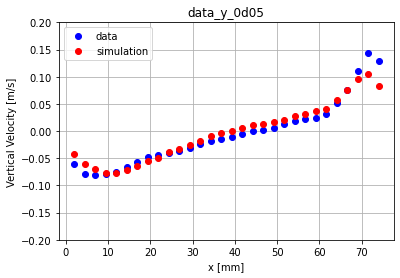

-0.07646459770114922
-0.017969900408859416


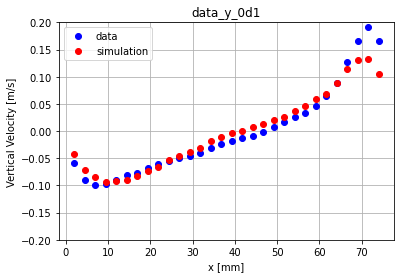

0.108428275862069
-0.007339246580826617


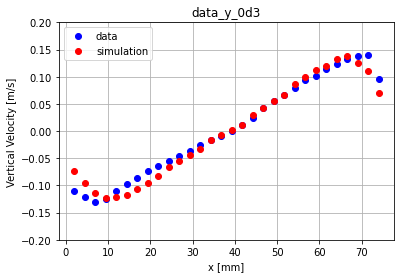

0.08998827586206905
-0.004221741813317935


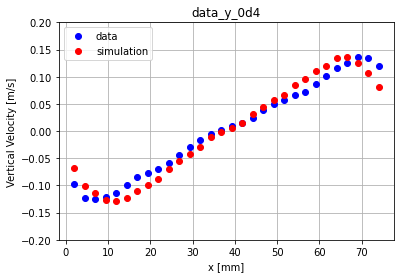

0.12525172413793093
-0.003057124158064667


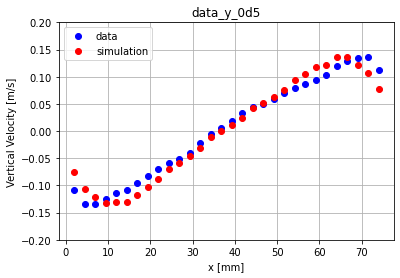

0.144696573971079
-0.004737968410972182


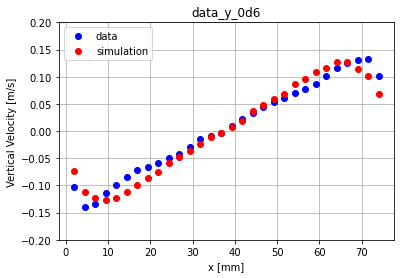

0.049257931034482616
-0.003492614391616654


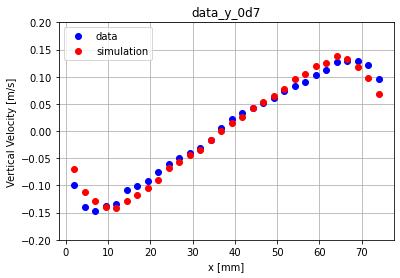

0.345496551724138
-0.008504730040997326


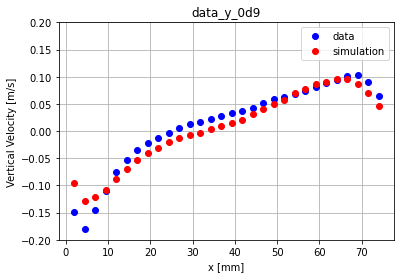

0.2888341012472488
-0.007911100526880443


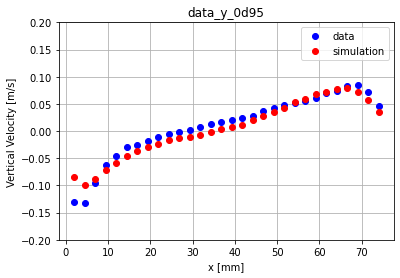

In [509]:
error = []
for i, key in enumerate(all_keys["interp"]):
  plt.figure()
  loc_file = all_keys["interp"][i]
  plt.plot(custom_x_points, interp_data_case_79[loc_file], 'bo', label='data')
  print(np.sum(interp_data_case_79[loc_file]))
  loc_file_2 = all_keys["sim"][i]
  plt.plot(custom_x_points, sim_data[loc_file_2]['vel_y'], 'ro', label='simulation')
  print(np.sum(sim_data[loc_file_2]['vel_y']))
  plt.title(key.split('.')[0])
  plt.ylim(-0.2, 0.2)
  plt.ylabel('Vertical Velocity [m/s]')
  plt.xlabel('x [mm]')
  plt.legend()
  error.append(np.linalg.norm(interp_data_case_79[loc_file] - sim_data[loc_file_2]['vel_y']))
  plt.grid()
  plt.show()

In [506]:
error

[0.15716739772269775,
 0.21718375454668423,
 0.1617539123079047,
 0.19334354531939765,
 0.1846902985340359,
 0.1892767992302542,
 0.15194232650727008,
 0.2155321303383312,
 0.1595040167800716]

In [507]:
print(np.average(error))
print(np.median(error))

0.18115490903184972
0.1846902985340359
